In [17]:
import numpy as np
import matplotlib.pyplot as plt
import graph_tool as gt
import networkx as nx
import os
import random
import csv

In [75]:
# use this to import sociopatterns data
def import_temporal_networks(filename, delimiter):
    temporalEdgeList = dict()
    node_num = set([])
    with open(filename) as contactData:
        contactList = csv.reader(contactData, delimiter=delimiter)
        for contact in contactList:
            t = float(contact[0])
            i = int(contact[1])
            j = int(contact[2])
            node_num.add(i)
            node_num.add(j)
            try:
                temporalEdgeList[t].extend([(i,j), (j,i)])
            except:
                temporalEdgeList[t] =[(i,j), (j,i)]
    return len(node_num), temporalEdgeList

num_nodes, edgeList = import_temporal_networks("Data/School/High-School_data_2013.csv", " ")

default_node_attrs = {'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
nodeList = {t:{n:default_node_attrs for n in range(num_nodes)} for t in list(edgeList.keys())}

'''for time in [list(nodeList.keys())[0]]:
    for i in range(1):#random.randrange(5)):
        
        to_infect = random.randrange(node_num)
        print(i, to_infect, 'before ', nodeList[time][to_infect])
        nodeList[time][to_infect]['status'] = 'I'
        print(i, to_infect, 'during ', nodeList[time][to_infect])
        print(i, to_infect, 'during ', nodeList[time][to_infect+ 1])

        #print(nodeList[time])

        nodeList[time][to_infect]['infect_prob'] = round(random.random(), 3)
        print(i, to_infect, 'after ', nodeList[time][to_infect])
        #print(nodeList[time])
        
        #to_recver = random.randrange(node_num)
        
        #print(i, to_recver, 'before ', nodeList[time][to_recver])
        #nodeList[time][to_recver]['status'] = 'R'
        #nodeList[time][to_recver]['infect_prob'] = 0.0
        
        #print(i, to_recver, 'after ', nodeList[time][to_recver])
        #print(i, to_infect, to_recver)
        
#for n in nodeList[list(nodeList.keys())[1]].keys():
    #print(nodeList[list(nodeList.keys())[1]][n])'''


"for time in [list(nodeList.keys())[0]]:\n    for i in range(1):#random.randrange(5)):\n        \n        to_infect = random.randrange(node_num)\n        print(i, to_infect, 'before ', nodeList[time][to_infect])\n        nodeList[time][to_infect]['status'] = 'I'\n        print(i, to_infect, 'during ', nodeList[time][to_infect])\n        print(i, to_infect, 'during ', nodeList[time][to_infect+ 1])\n\n        #print(nodeList[time])\n\n        nodeList[time][to_infect]['infect_prob'] = round(random.random(), 3)\n        print(i, to_infect, 'after ', nodeList[time][to_infect])\n        #print(nodeList[time])\n        \n        #to_recver = random.randrange(node_num)\n        \n        #print(i, to_recver, 'before ', nodeList[time][to_recver])\n        #nodeList[time][to_recver]['status'] = 'R'\n        #nodeList[time][to_recver]['infect_prob'] = 0.0\n        \n        #print(i, to_recver, 'after ', nodeList[time][to_recver])\n        #print(i, to_infect, to_recver)\n        \n#for n in nod

Drawing the graph for time 1385982020.0
35


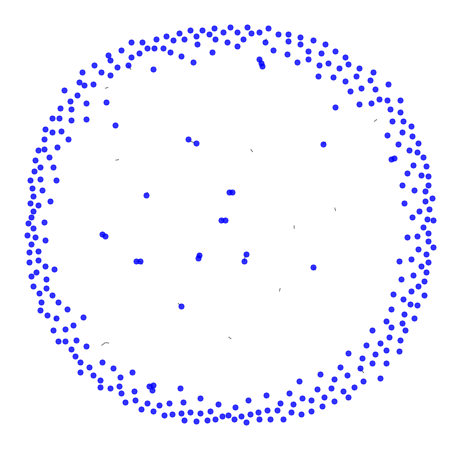

In [76]:
def drawContagion(edgeList, nodeList, exp_name = ''):
    
    if not os.path.exists('output/' + exp_name):
        os.makedirs('output/' + exp_name)
    
    pos = None
    for ts in [list(edgeList.keys())[0]]: #list(edgeList.keys())):
        print('Drawing the graph for time ' + str(ts))
        
        I = []
        S = []
        R = []
        
        G = nx.Graph()
        G.add_nodes_from(list(nodeList[ts].keys()))
        #print('Nodes: ', G.nodes())
        #print(edgeList[ts])
        G.add_edges_from(edgeList[ts])
        #nx.draw(G)
        

        # make a graph from edgelist
        for n, attr in nodeList[ts].items():
            if attr['status'] == 'I':
                I.append(n)
            elif attr['status'] == 'S':
                S.append(n)
            elif attr['status'] == 'R':
                R.append(n)
        plt.figure(figsize = (8,8))
        print(len(G.edges()))
        if pos is None:
            pos=nx.spring_layout(G) # positions for all nodes

        # nodes
        nx.draw_networkx_nodes(G,pos,
                       nodelist=I,
                       node_color='r',
                       node_size=25,
                       alpha=0.8,
                       label = 'I')
        nx.draw_networkx_nodes(G,pos,
                       nodelist=S,
                       node_color='b',
                       node_size=25,
                       alpha=0.8,
                       label = 'S')
        nx.draw_networkx_nodes(G,pos,
                       nodelist=R,
                       node_color='c',
                       node_size=25,
                       alpha=0.8,
                       label = 'R')

        # edges
        nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5, edge_cmap = 'Reds')
        #nx.draw_networkx_edges(G,pos, edgelist=[(0,1),(1,2),(2,3),(3,0)],alpha=0.5,edge_color='r')
        
        #nx.draw_networkx_edges(G,pos, edgelist=[(4,5),(5,6),(6,7),(7,4)], width=8,alpha=0.5,edge_color='b')


        # some labels
        #labels={n:vals['status'] for n,vals in nodeList[ts].items()}

        #nx.draw_networkx_labels(G,pos,labels,font_size=16)

        plt.axis('off')

        plt.savefig('simTime_{0:05f}.jpg'.format(ts), bbox_inches = 'tight')
                
drawContagion(edgeList, nodeList, exp_name = 'testing_drawFunc_randomeDynamics/')